In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data//pi/3phaseFLTKp0.5Ki5Step0.1No.0.csv')
data

,Time,Subsystem #1|CTLs|Vars|PrefPV,Subsystem #1|CTLs|Vars|VDCerr
0,0.00000,0.317215,0.000061
1,0.00005,0.317214,0.000060
2,0.00010,0.317213,0.000058
3,0.00015,0.317212,0.000056
4,0.00020,0.317212,0.000055
...,...,...,...
1995,0.09975,1.990720,1.849357
1996,0.09980,1.991062,1.849116
1997,0.09985,1.991403,1.848874
1998,0.09990,1.991744,1.848631


<Axes: xlabel='Time'>

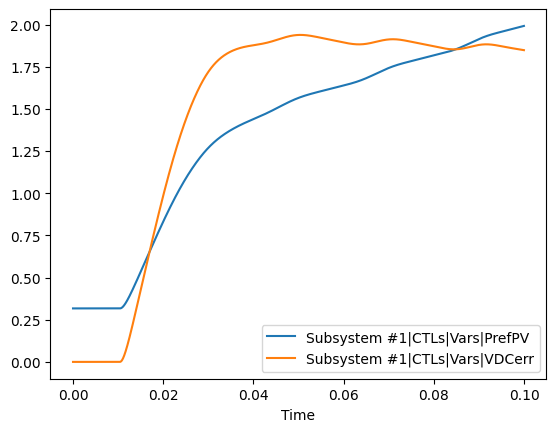

In [4]:
data.set_index('Time').plot()

In [5]:
data.columns = ['Time', 'I', 'O']

In [5]:
time_step = data.Time[1] - data.Time[0]

In [6]:
I_t = (data.I.to_numpy()[2:] - data.I.to_numpy()[:-2]) / (2 * time_step)

In [7]:
O_t = (data.O.to_numpy()[2:] - data.O.to_numpy()[:-2]) / (2 * time_step)

<Axes: >

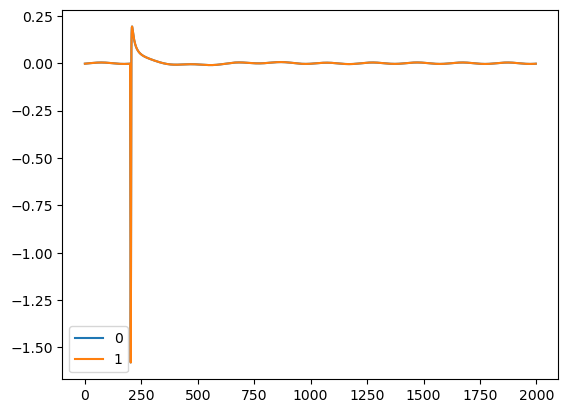

In [8]:
pd.DataFrame([I_t*0.025+data.I.to_numpy()[1:-1]*0.5, O_t]).T.plot()

<Axes: >

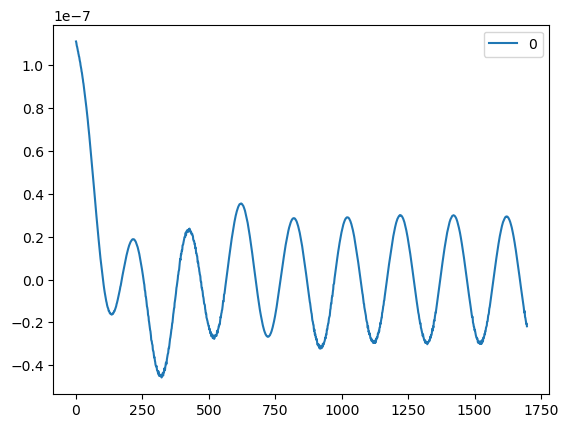

In [9]:
pd.DataFrame((I_t*0.025+data.I.to_numpy()[1:-1]*0.5-O_t)[300:]).plot()

In [10]:
data['err']=0

In [11]:
data

,Time,I,O,err
0,0.00000,-0.000184,-0.000103,0
1,0.00005,-0.000189,-0.000103,0
2,0.00010,-0.000194,-0.000103,0
3,0.00015,-0.000198,-0.000103,0
4,0.00020,-0.000202,-0.000103,0
...,...,...,...,...
1995,0.09975,-0.000191,-0.000102,0
1996,0.09980,-0.000197,-0.000102,0
1997,0.09985,-0.000202,-0.000102,0
1998,0.09990,-0.000207,-0.000102,0


In [17]:
err = list(I_t*0.025+data.I.to_numpy()[1:-1]*0.5-O_t)

In [13]:
err

[-2.3676350085783532e-08,
 -2.3898549954964876e-08,
 -2.4071599931223264e-08,
 -2.4825050044720992e-08,
 -2.5665649996346046e-08,
 -2.5782099969708094e-08,
 -2.6022400101497617e-08,
 -2.681764998675555e-08,
 -2.7061249909974758e-08,
 -2.693635010615064e-08,
 -2.796379997959536e-08,
 -2.8781699961495308e-08,
 -2.8021800125080376e-08,
 -2.8332899982977736e-08,
 -2.9184299970923776e-08,
 -2.8767699967839622e-08,
 -2.886954994052275e-08,
 -2.9774700091209604e-08,
 -2.9217450008001133e-08,
 -2.9179199988855174e-08,
 -2.994109998816349e-08,
 -3.018570003064094e-08,
 -2.9370900026047097e-08,
 -2.8755349946470556e-08,
 -2.98433500020524e-08,
 -3.01072499517426e-08,
 -2.8872800053321e-08,
 -2.895119998185154e-08,
 -2.9318799973964207e-08,
 -2.8902550026584962e-08,
 -2.832915001280828e-08,
 -2.7319099959446577e-08,
 -2.7813649936155038e-08,
 -2.7650000086407167e-08,
 -2.7406700036378476e-08,
 -2.7155549921567546e-08,
 -2.6160399994477543e-08,
 -2.6122549996602032e-08,
 -2.5857049936297075e-08,
 

In [14]:
err = [err[0]] + err + [err[-1]]

In [15]:
data['err']=err

In [40]:
# data.to_csv('data/1211_PI2_v2.csv')

<Axes: >

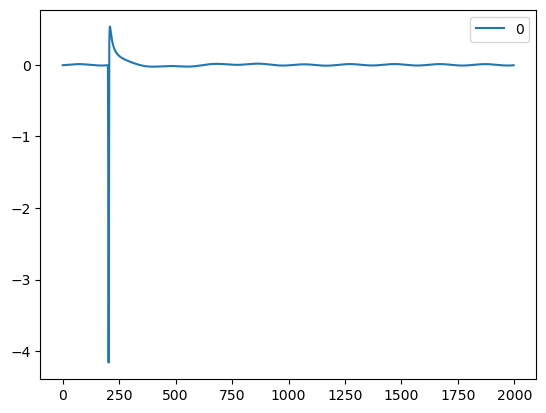

In [19]:
pd.DataFrame((I_t*0.91/10+data.I.to_numpy()[1:-1]*(-0.91)-O_t)-err).plot()

In [41]:
err = pd.read_csv('data/1211_PI2_v2.csv')['err'].to_numpy().reshape(-1, 1)

In [43]:
import numpy as np

In [48]:
np.vstack((err ,err, err)).shape

(6000, 1)